# Project: Investigate a Dataset - [Gapminder world]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> I have slected four datasets from Gapminder to analyze: 

 >  1) GDP per capita in US dollars adjusted for inflation: it contains a column for country name and multiple columns                for the GDP per capita from 1960-2020
   
 >  2) Total population: it contains a column for country name and multiple columns for the total population  from 1800-2100
   
 >  3) Population density per square KM: it contains a column for country name and multiple columns for the population density 
      from 1950-2100
      
 >  4) Annual population growth rate: it contains a column for country name and multiple columns for the population growth rate       from 1961-2020       
      


### Question(s) for Analysis
> GDP per capita is often used to indicate the overall wellbeing for the average person in a given country, knowing that the questions I well try to answer are: for a certain year, is their any relationship between GDP per capita (dependent variable) and population trends (total population, population density and annual population growth, all three of them are independent variables) and if there is, which indepent variable is the most correlated to the dependent variable and is there any correlation between the independent variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# creating data frames:
# pt = total population
# pd = population density
# pg = population growth 

df_gdp = pd.read_csv('gdppercapita_us_inflation_adjusted.csv')
df_pt = pd.read_csv('population_total.csv')
df_pd = pd.read_csv('population_density_per_square_km.csv')
df_pg = pd.read_csv('population_growth_annual_percent.csv')

# checking the shape of each dataset:

print(df_gdp.shape)
print(df_pt.shape)
print(df_pd.shape)
print(df_pg.shape)


(206, 62)
(197, 302)
(234, 152)
(217, 61)


In [3]:
# checking for null values and the data types for the year column I have chosen to do the analysis on:

print(df_gdp['2019'].isna().sum())
print(df_pt['2019'].isna().sum())
print(df_pd['2019'].isna().sum())
print(df_pg['2019'].isna().sum())

print(df_gdp['2019'].dtypes)
print(df_pt['2019'].dtypes)
print(df_pd['2019'].dtypes)
print(df_pg['2019'].dtypes)

12
0
0
1
object
object
object
object


In [4]:
# checking for null vaules and the data data dypes of the country columns:

print(df_gdp['country'].isna().sum())
print(df_pt['country'].isna().sum())
print(df_pd['country'].isna().sum())
print(df_pg['country'].isna().sum())


print(df_gdp['country'].dtypes)
print(df_pt['country'].dtypes)
print(df_pd['country'].dtypes)
print(df_pg['country'].dtypes)


0
0
0
0
object
object
object
object



## Data Cleaning

since I'm only interested in comparing GDP with the population trends for a certain year, I'm going to drop out all year columns in the four datasets except for 2019 (being the most recent data (2020 is skewed because of the pandemic)). I'm going to rename the 2019 year column to an appropriate name for each dataset, combine the four datasets into one and drop out any rows with null values. finally, I'm going to change the dtype of the 2019 coumns from object to float

In [5]:
# Droping all year columns excpet for 2019:

df_gdp.drop(df_gdp.columns.difference(['country','2019']), 1, inplace=True)
df_pt.drop(df_pt.columns.difference(['country','2019']), 1, inplace=True)
df_pd.drop(df_pd.columns.difference(['country','2019']), 1, inplace=True)
df_pg.drop(df_pg.columns.difference(['country','2019']), 1, inplace=True)
df_pg.head()

,country,2019
0,Aruba,0.437
1,Afghanistan,2.31
2,Angola,3.24
3,Albania,−0.426
4,Andorra,0.179


In [6]:
# Renaming 2019 columns to a name reflective to the values they hold, since we already know that they are all vaules of 2019:

df_gdp.rename(columns={'2019':'gdp_per_capita'}, inplace=True)
df_pt.rename(columns={'2019':'total_population'}, inplace=True)
df_pd.rename(columns={'2019':'population_density '}, inplace=True)
df_pg.rename(columns={'2019':'population_growth_rate'}, inplace=True)

df_pg.head()

,country,population_growth_rate
0,Aruba,0.437
1,Afghanistan,2.31
2,Angola,3.24
3,Albania,−0.426
4,Andorra,0.179


In [7]:
# Combing the four datasets into one:

df_gdp_pt=df_gdp.merge(df_pt,how='inner', on='country')
df_gdp_pt_pd=df_gdp_pt.merge(df_pd,how='inner',on='country')
df_gdp_pt_pd_pg=df_gdp_pt_pd.merge(df_pg,how='inner',on='country')
df_gdp_pt_pd_pg.columns = df_gdp_pt_pd_pg.columns.str.strip()

In [8]:
# Droping rows with null vaules:

df_gdp_pt_pd_pg.dropna(inplace=True)
df_gdp_pt_pd_pg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 191
Data columns (total 5 columns):
country                   186 non-null object
gdp_per_capita            186 non-null object
total_population          186 non-null object
population_density        186 non-null object
population_growth_rate    186 non-null object
dtypes: object(5)
memory usage: 8.7+ KB


In [9]:
# changing data types of all columns expect for country column from object to float:

df_gdp_pt_pd_pg['population_growth_rate']=df_gdp_pt_pd_pg['population_growth_rate'].str.replace('−', '-').astype(float)
df_gdp_pt_pd_pg['population_density']=df_gdp_pt_pd_pg['population_density'].str.replace('k','*1e3').map(pd.eval).astype(float)
df_gdp_pt_pd_pg['gdp_per_capita']=df_gdp_pt_pd_pg['gdp_per_capita'].str.replace('k','*1e3').map(pd.eval).astype(float)
df_gdp_pt_pd_pg['total_population']=df_gdp_pt_pd_pg['total_population'].str.replace('k','*1e3').str.replace('M', '*1e6').str.replace('B', '*1e9').map(pd.eval).astype(float)

In [10]:
df_gdp_pt_pd_pg.info()
df_gdp_pt_pd_pg

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 191
Data columns (total 5 columns):
country                   186 non-null object
gdp_per_capita            186 non-null float64
total_population          186 non-null float64
population_density        186 non-null float64
population_growth_rate    186 non-null float64
dtypes: float64(4), object(1)
memory usage: 8.7+ KB


,country,gdp_per_capita,total_population,population_density,population_growth_rate
0,Afghanistan,573.0,38000000.0,58.30,2.310
1,Angola,3110.0,31800000.0,25.50,3.240
2,Albania,5210.0,2880000.0,105.00,-0.426
3,Andorra,46000.0,77100.0,164.00,0.179
4,United Arab Emirates,41400.0,9770000.0,117.00,1.440
5,Argentina,9740.0,44800000.0,16.40,0.993
6,Armenia,4730.0,2960000.0,104.00,0.203
7,Antigua and Barbuda,15400.0,97100.0,221.00,0.861
8,Australia,57200.0,25200000.0,3.28,1.520
9,Austria,50500.0,8960000.0,109.00,0.445


In [11]:
#saving the cleaned dataset into a new file:
df_gdp_pt_pd_pg.to_csv("cleaned_gapminder_dataset.csv",index=False)

<a id='eda'></a>
## Exploratory Data Analysis


## is their any relationship between GDP per capita and population trends (total population, population density and annual population growth). and if so, which independent variable is most correlated to the dependent variable.

In [12]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_gapminder=pd.read_csv('cleaned_gapminder_dataset.csv')
df_gapminder.describe()

,gdp_per_capita,total_population,population_density,population_growth_rate
count,186.000,186.000,186.000,186.000
mean,15532.871,40593299.462,390.768,1.287
std,24279.663,149870464.096,2073.808,1.094
min,208.000,10800.000,2.080,-1.670
25%,2035.000,2080000.000,38.000,0.492
50%,6020.000,8555000.000,88.800,1.240
75%,17075.000,29950000.000,215.750,2.072
max,209000.000,1430000000.000,26200.000,4.470


In [13]:
#creating a dataframes for low,medium and high gdp per capitia to compare with the independent variables, I'm using the world bank definitions 
# as a guideline:https://blogs.worldbank.org/opendata/new-world-bank-country-classifications-income-level-2020-2021.

df_low_gdp=df_gapminder.query('gdp_per_capita < 5000')
df_medium_gdp=df_gapminder.query('gdp_per_capita >= 5000' and 'gdp_per_capita < 15000')
df_high_gdp=df_gapminder.query('gdp_per_capita >= 15000')

148.736785714
149.955681818
979.419814815


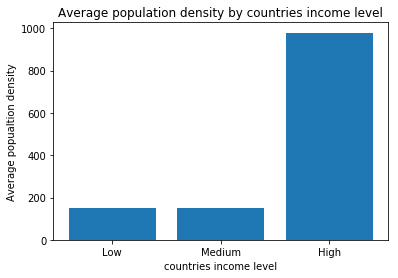

In [26]:
# comparing the mean of population density for each income bracket:

print(df_low_gdp.mean().population_density)

print(df_medium_gdp.mean().population_density)

print(df_high_gdp.mean().population_density)

locations = [1,2,3]
heights = [df_low_gdp.population_density.mean(), df_medium_gdp.population_density.mean(),df_high_gdp.population_density.mean()]
labels = ['Low','Medium', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average population density by countries income level')
plt.xlabel('countries income level')
plt.ylabel('Average popualtion density');

it looks like the mean of the population density for the low and medium income countries are very similar, however the mean for the high income countries is much higher 

1.83744047619
1.46975454545
0.841296296296


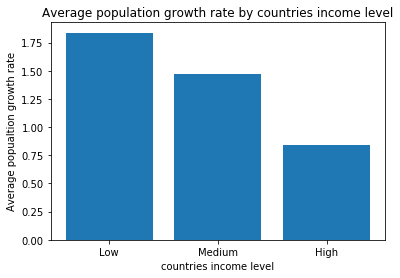

In [27]:
# comparing the mean of population growth rate for each income bracket:

print(df_low_gdp.population_growth_rate.mean())

print(df_medium_gdp.population_growth_rate.mean())

print(df_high_gdp.population_growth_rate.mean())

locations = [1,2,3]
heights = [df_low_gdp.population_growth_rate.mean(),df_medium_gdp.population_growth_rate.mean(),df_high_gdp.population_growth_rate.mean()]
labels = ['Low','Medium', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average population growth rate by countries income level')
plt.xlabel('countries income level')
plt.ylabel('Average popualtion growth rate');

it looks like the mean growth rate for low  income countries are the highest, whereas the the mean for high income countries is lowest

45153125.0
47667650.0
23300442.5926


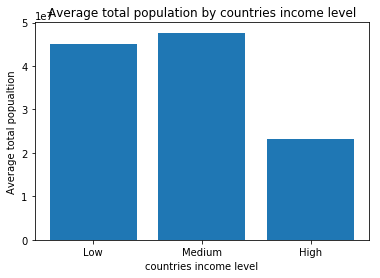

In [28]:
# comparing the mean of total population for each income bracket:

print(df_low_gdp.total_population.mean())

print(df_medium_gdp.total_population.mean())

print(df_high_gdp.total_population.mean())

locations = [1,2,3]
heights = [df_low_gdp.total_population.mean(), df_medium_gdp.total_population.mean(),df_high_gdp.total_population.mean()]
labels = ['Low','Medium', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average total population by countries income level')
plt.xlabel('countries income level')
plt.ylabel('Average total popualtion');

it looks like the mean of the total population for the low and medium income countries are very similar, however the mean for the high income countries is lower

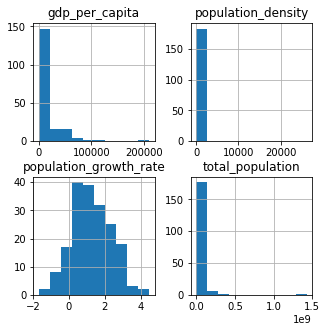

In [17]:
df_gapminder.hist(figsize=[5,5]);

In [18]:
# function takes two arguments: x-axis variable and y-axis variable and plot a scatter graph of the relationship between the two

def scatterplot(x_axis_var, y_axis_var):
    
    df_gapminder.plot.scatter(x= x_axis_var, y=y_axis_var,figsize=[5,5])

    plt.title(F'scatter plot between {x_axis_var} and {y_axis_var}'.title(),
               fontsize = 9, weight = "bold")
    
    plt.xlabel(x_axis_var.title(),
               fontsize = 7, weight = "bold")
    
    plt.ylabel(y_axis_var.title(),
               fontsize = 7, weight = "bold")  
    
    print("pearson's coefficient =",df_gapminder[x_axis_var].corr(df_gapminder[y_axis_var]))
    

pearson's coefficient = -0.0497040096289


(0, 100000000)

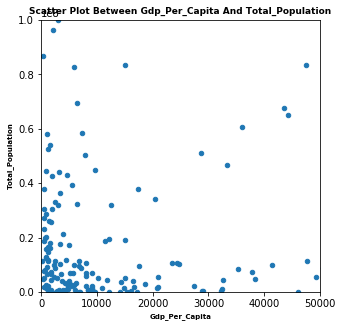

In [19]:
scatterplot('gdp_per_capita','total_population')
    
#to limit the outliers and have a cleaner graph:
plt.xlim([0, 50000])
plt.ylim([0,100000000])

no clear correlation between population size and gdp per capitia from the graph or Pearson's Correlation Coefficient

pearson's coefficient = 0.601088337156


(0, 1000)

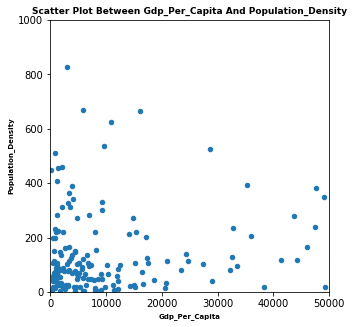

In [20]:
scatterplot('gdp_per_capita','population_density')

#to limit outliers:
plt.xlim([0, 50000])
plt.ylim([0,1000])

no clear correlation between gdp per capitia and population density from the graph, were as Pearson's Correlation Coefficient
indicate a positive correlation.

pearson's coefficient = -0.223465007643


(-1, 5)

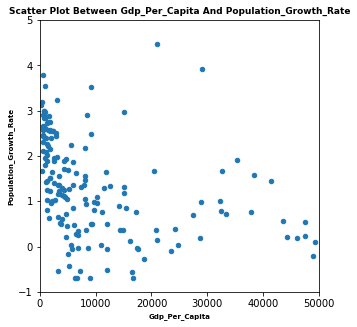

In [21]:
scatterplot('gdp_per_capita','population_growth_rate')

# to limit the outliers:
plt.xlim([0, 50000])
plt.ylim([-1,5])

no clear correlation between gdp per capitia and population growth rate from the graph, were as Pearson's Correlation Coefficient indicate a somewhat negative correlation

### Is there any correlation between the three independent variables (total population, population density and population growth rate)

pearson's coefficient = -0.0270447789757


(0, 1000)

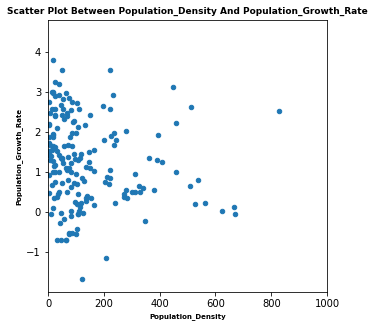

In [22]:
scatterplot('population_density','population_growth_rate')
    
plt.xlim([0,1000])

no clear correlation bettween population density and growth rate

pearson's coefficient = -0.02071925781


(0, 1000)

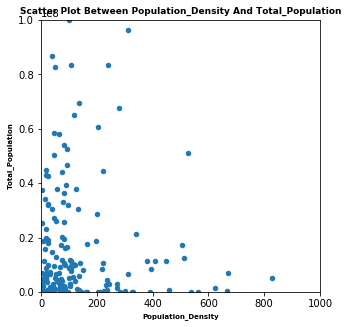

In [23]:
scatterplot('population_density','total_population')

plt.ylim([0,100000000])
plt.xlim([0,1000])

no clear correlation bettween population density and total population

pearson's coefficient = -0.0551267313013


(-1, 5)

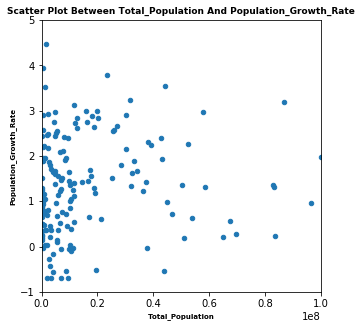

In [24]:
scatterplot('total_population','population_growth_rate')

plt.xlim([0,100000000])
plt.ylim([-1,5])

no clear correlation bettween population growth rate and total population

<a id='conclusions'></a>
## Conclusions

> after my analysis, I conclude that there is no particular correlation betwwen GDP per capita and total population, a weak negative correlation between GDP per capita and population growth rate and a positive correlation between GDP per capita and population density. I also found that high income countries tend to have a higher average  population density and a lower average total population and population growth rate compared to medium and low income countries. my analysis also indicated no correlation between any of the three independent variables whatsoever. however, a much depper analysis using machine learining and inferential statistics would help in proving or disproving my findings. 

### Limitations

>  the cutoff values that I used in spliting the GDP per capita column into high,medium and low income countries datafrmes might not be accurate, since I depended on a external source and didnt follow the guidelines in that source fully.

## Submitting your Project 

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0